In [107]:
% matplotlib inline
from math import log
from matplotlib import pyplot as plt
from IPython.display import display
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pytest
import numpy as np
import scipy.stats as ss
import random

In [108]:
# calculates probability mass function for all mixtures and one experimental mass for one MOF
def probability_mass_func(mass_ads_f, exp_mass, err_f, error_type):
    all_results = []
    prob_mass_func = []
    mrange = 0.001
#     creates truncated probability distribution, cannot have probabilities for negative
    myclip_a, myclip_b = 0, float(max(mass_ads_f)) * (1 + mrange)
    my_mean, my_std = float(exp_mass), float(err_f)
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
#     calculates pmf at each mass value 
    for mass in mass_ads_f:
        prob_upper = ss.truncnorm.cdf(float(mass) * (1 + mrange), a, b, loc = my_mean, scale = my_std)
        prob_lower = ss.truncnorm.cdf(float(mass) * (1 - mrange), a, b, loc = my_mean, scale = my_std)
        prob = prob_upper - prob_lower
        prob_mass_func.append(prob)
    all_results = [number / sum(prob_mass_func) for number in prob_mass_func]
    return(all_results)

In [109]:
# calculates joint probability for each mof in the specified array
def joint_pmf(pmf_results_f):
    joint_prob = None
    for mof in pmf_results_f:
        if joint_prob is None:
            joint_prob = np.array(mof)
        else:
            joint_prob *= np.array(mof)
    normalized_array_prob = [ number / sum(joint_prob) for number in joint_prob]
    return(normalized_array_prob)

In [110]:
# sets up list of MOFs/input types
def choose_mof_types(lin_pos, number_mofs_1, 
                     lin_neg, number_mofs_2, 
                     curve_up, number_mofs_3, 
                     curve_down, number_mofs_4,  
                     flat, number_mofs_5):
    mof_types = []
    number_mofs = []
    if lin_pos == True:
        mof_types.append('lin_pos')
        number_mofs.append(number_mofs_1)
    if lin_neg == True:
        mof_types.append('lin_neg')
        number_mofs.append(number_mofs_2)
    if curve_up == True:
        mof_types.append('curve_up')
        number_mofs.append(number_mofs_3)
    if curve_down == True:
        mof_types.append('curve_down')
        number_mofs.append(number_mofs_4)
    if flat == True:
        mof_types.append('flat')
        number_mofs.append(number_mofs_5)
    return(mof_types, number_mofs)

In [111]:
def mass_response(plot_inputs, number_each_type, error, error_type):
    data = []
#     creates list of mole fractions for a binary gas mixture
    gas_frac = np.linspace(0.0, 1.0, 101)
#     for each MOF/input type chosen, masses are calculated using functions
    for each in plot_inputs:
        if each == 'lin_pos':
            mass_ads = gas_frac * 272 + 8
            data.append(mass_ads)
        elif each == 'lin_neg':
            mass_ads = gas_frac * -272 + 280
            data.append(mass_ads)
        elif each == 'curve_up':
            mass_ads = (gas_frac - 0.5) * (gas_frac - 0.5) * 267 + 100
            data.append(mass_ads)
        elif each == 'curve_down':
            mass_ads = (gas_frac - 0.5) * (gas_frac - 0.5) * -267 + 100
            data.append(mass_ads)
        else:
            mass_ads = (gas_frac - gas_frac) + 100
            data.append(mass_ads)
#     plots each input type
    for data_set in data:
        plt.plot(gas_frac, data_set)
    plt.xlabel('Mole Fraction')
    plt.ylabel('Mass Adsorption')
    plt.show()
#     choose experimental gas mixture to be the halfway point, (0.5, 0.5)
    experimental_mixture = len(gas_frac)//2
    print(gas_frac[experimental_mixture])
    
#     sets up empty array for probabilities from all MOFs in array
    all_element_probabilities = []
    for mof_element_number in range(len(data)):
#         calls number of MOFs of the current MOF type, specified by user
        number_mofs = number_each_type[mof_element_number]        
#         calls mass value for the current MOF at the experimental mixture chosen
        experimental_mass_base = data[mof_element_number][experimental_mixture]
#         sets lower limit for error, eliminating any chance for negative masses
        if experimental_mass_base < error:
            error_ll = 0
        else:
            error_ll = -1*error
#         calculates probabilities for each MOF of the current type
        for mof_element in range(number_mofs):
#         adds an error in the range of -error to +error
            experimental_mass = experimental_mass_base + random.choice((error, error_ll)) * round(random.random(),3)
#         calls function to calculate pmf values for all possible mixtures
            pmf_results = probability_mass_func(data[mof_element_number], experimental_mass, error, error_type)
            all_element_probabilities.append(pmf_results)
            print(experimental_mass)
#     calls function to calculate joint probability over all MOFs
    joint_probability = joint_pmf(all_element_probabilities)    
    
    plt.plot(gas_frac, joint_probability)
    plt.axis([0,1.0,0,max(joint_probability) + .02])
    plt.xlabel('Mole Fraction')
    plt.ylabel('Probability Mass Function')
    plt.show()
    
    plt.plot(gas_frac, joint_probability)
    plt.axis([0,1.0,0,1.0])
    plt.xlabel('Mole Fraction')
    plt.ylabel('Probability Mass Function')
    plt.show()
    
    return()

In [112]:
# can choose which types of MOFs and how many are in an array
number_of_mofs = (1, 10, 1)
different_mof_types = interactive(choose_mof_types, lin_pos = True,
                                                    number_mofs_1 = number_of_mofs,
                                                    lin_neg = True, 
                                                    number_mofs_2 = number_of_mofs,
                                                    curve_up = True,
                                                    number_mofs_3 = number_of_mofs,
                                                    curve_down = True,
                                                    number_mofs_4 = number_of_mofs,
                                                    flat = True,
                                                    number_mofs_5 = number_of_mofs)
display(different_mof_types)

(['lin_pos', 'curve_up'], [1, 1])

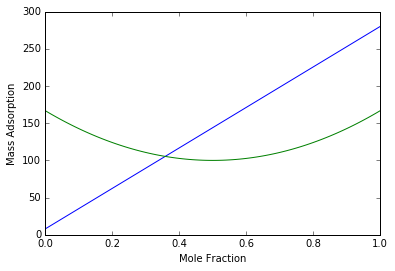

0.5
155.572
103.718


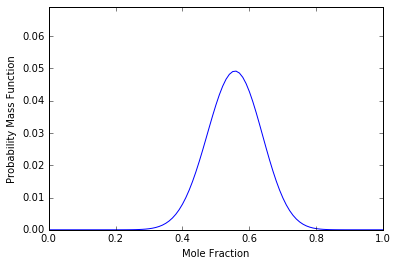

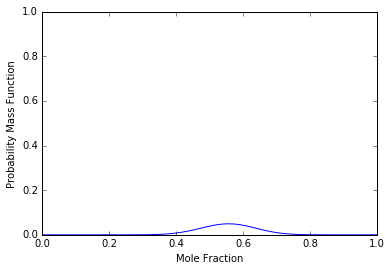

()

In [115]:
# range of error values to choose from, runs code to calculate probabilities
error_values = (1.0, 1000, 1)
types_of_mofs = different_mof_types.result[0]
numbers_of_mofs = different_mof_types.result[1]

interact(mass_response,
         plot_inputs = fixed(types_of_mofs),
         number_each_type = fixed(numbers_of_mofs),
         error = error_values,
         error_type = fixed(max(error_values))
         )